In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")


In [2]:
dataf = pd.read_csv("your_dataset.csv")
dataf


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,NaN,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3.0,Vistara,UK-995,NaN,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,NaN,Vistara,UK-822,NaN,Morning,one,Evening,Hyderabad,Business,10.08,49.0,69265.0
300149,300149.0,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,300150.0,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,300151.0,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


In [3]:
dataf.isna().sum()

Unnamed: 0          15044
airline             15049
flight              14985
source_city         14991
departure_time      15043
stops               14971
arrival_time        14939
destination_city    14886
class               15054
duration            14995
days_left           14961
price               15173
dtype: int64

In [4]:
dataff = dataf.dropna()

In [5]:
dataff.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
dataff

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,5.0,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,6.0,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300146,300146.0,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49.0,51345.0
300149,300149.0,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49.0,77105.0
300150,300150.0,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49.0,79099.0
300151,300151.0,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49.0,81585.0


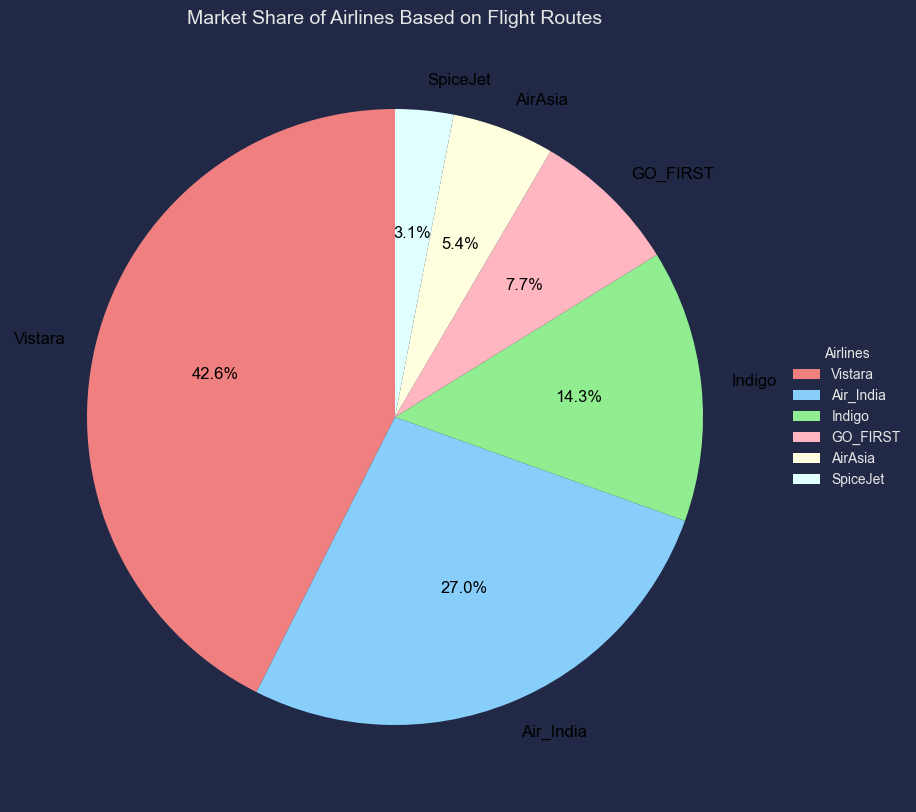

In [7]:
market_share = dataff['airline'].value_counts()
custom_colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan']
plt.figure(figsize=(10, 10))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=90, colors=custom_colors,
        textprops={'fontsize': 12, 'color': 'black'})
plt.title('Market Share of Airlines Based on Flight Routes', fontsize=14)
plt.legend(title='Airlines', bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10)
plt.show()

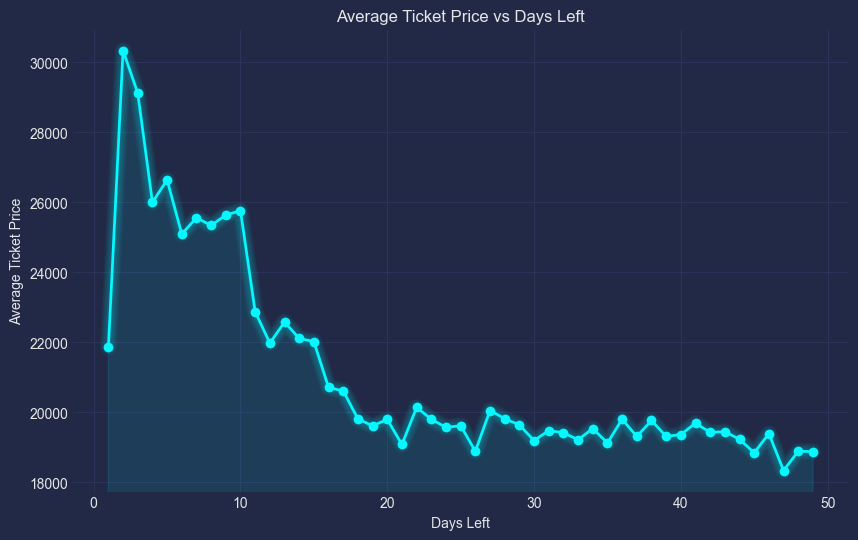

In [8]:
data_for_plot = dataff.dropna(subset=['days_left', 'price'])
average_price_by_days = data_for_plot.groupby('days_left')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_days['days_left'], average_price_by_days['price'], marker='o', color='C0', linestyle='-', linewidth=2)
plt.xlabel('Days Left')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price vs Days Left')
mplcyberpunk.add_glow_effects()
plt.grid(True)
plt.show()

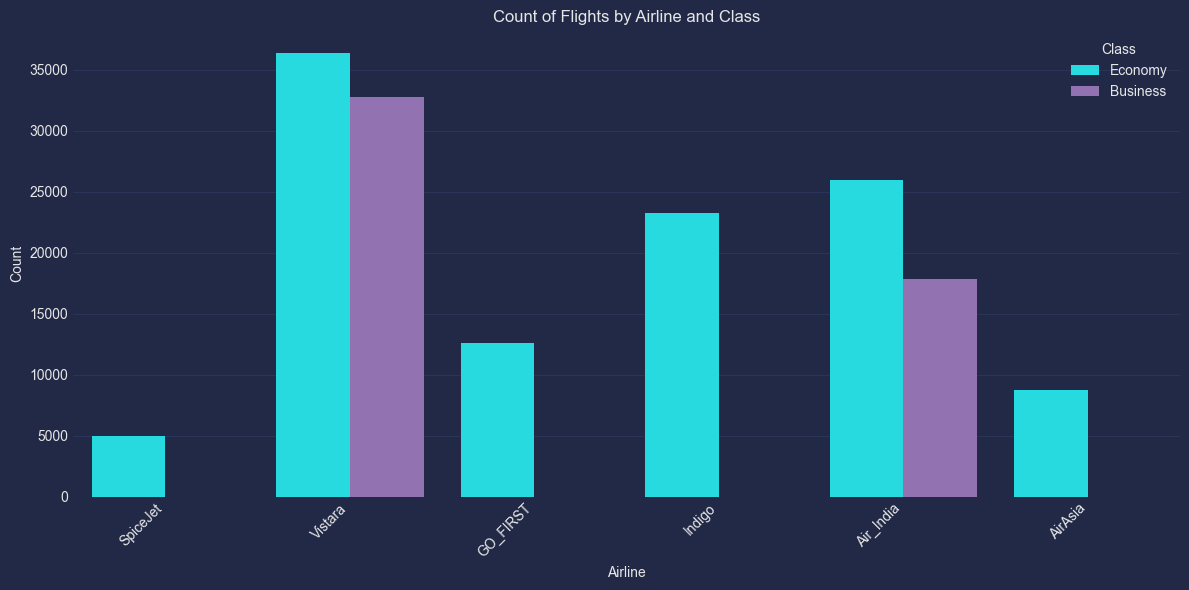

In [9]:
flight_data = dataff[['airline', 'class', 'source_city', 'destination_city']]
custom_palette = {'Economy': 'C0', 'Business': 'C5'}
plt.figure(figsize=(12, 6))
sns.countplot(data=flight_data, x='airline', hue='class', palette=custom_palette)
mplcyberpunk.add_glow_effects(gradient_fill=True)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Count of Flights by Airline and Class')
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

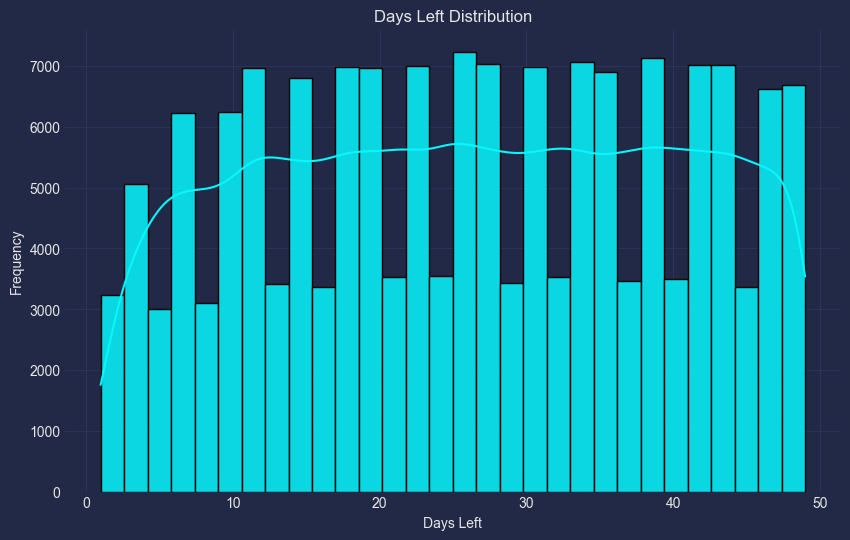

Skewness of Days Left: -0.036005607891737


In [10]:
data_days_left_not_null = dataff.dropna(subset=['days_left'])
plt.figure(figsize=(10, 6))
sns.histplot(data_days_left_not_null['days_left'], kde=True, bins=30, color='C0',alpha=0.85)
plt.title('Days Left Distribution')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()
days_left_skewness = data_days_left_not_null['days_left'].skew()
print(f"Skewness of Days Left: {days_left_skewness}")

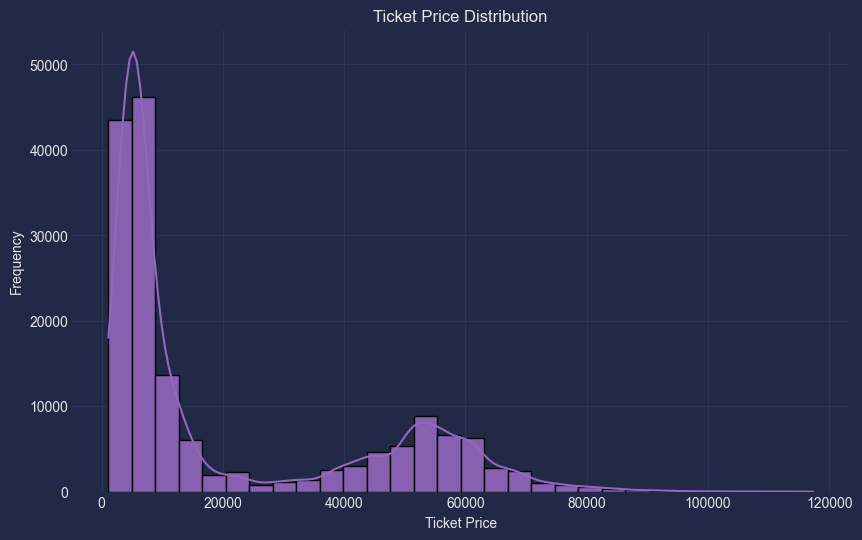

Skewness of Ticket Price: 1.0610258334180254


In [11]:
data_price_not_null = dataff.dropna(subset=['price'])
plt.figure(figsize=(10, 6))
sns.histplot(data_price_not_null['price'], kde=True, bins=30, color='C5',alpha=0.9)
plt.title('Ticket Price Distribution')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.show()
price_skewness = data_price_not_null['price'].skew()
print(f"Skewness of Ticket Price: {price_skewness}")

C:\Users\kolup\AppData\Local\Temp\ipykernel_29952\2371997668.py:3: FutureWarning: The provided callable <function mean at 0x0000026CFA166A20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_economy = pd.pivot_table(data_economy, values='price', index='source_city', columns='destination_city', aggfunc=np.mean)


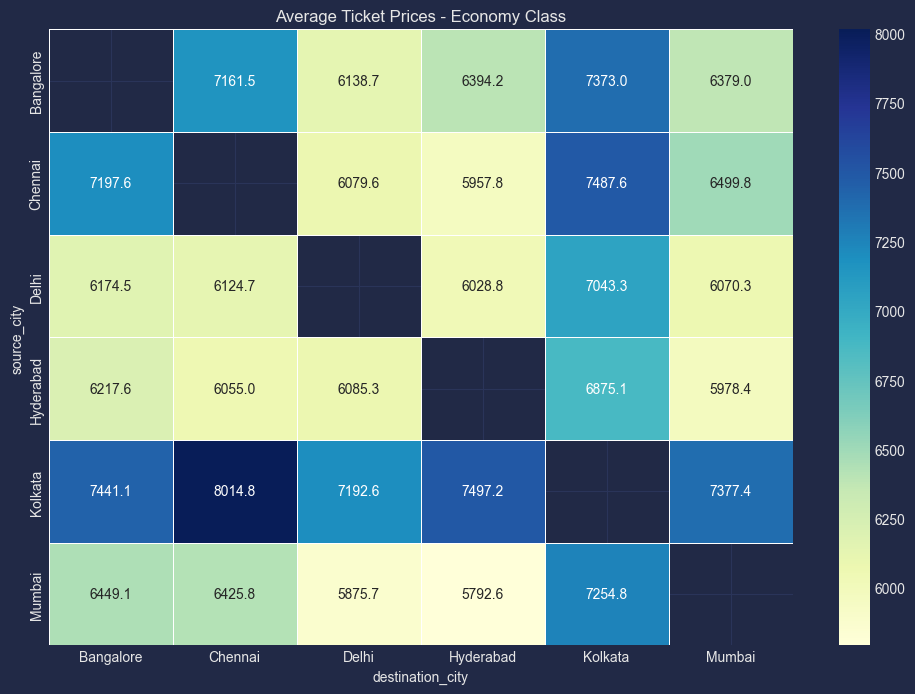

C:\Users\kolup\AppData\Local\Temp\ipykernel_29952\2371997668.py:9: FutureWarning: The provided callable <function mean at 0x0000026CFA166A20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_business = pd.pivot_table(data_business, values='price', index='source_city', columns='destination_city', aggfunc=np.mean)


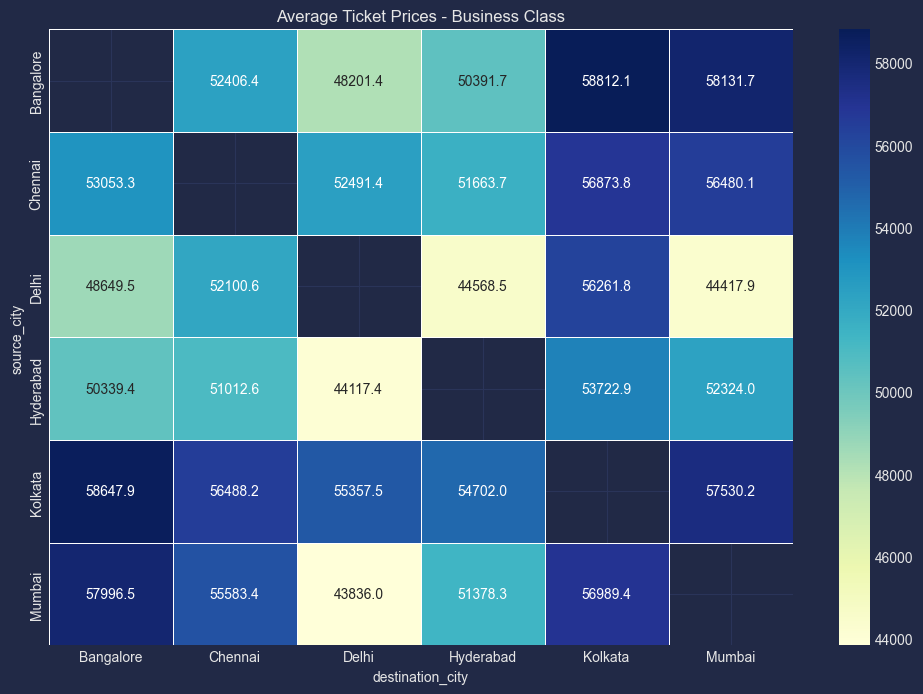

In [12]:
data_heatmap_not_null = dataf.dropna(subset=['class', 'source_city', 'destination_city', 'price'])
data_economy = data_heatmap_not_null[data_heatmap_not_null['class'] == 'Economy']
pivot_economy = pd.pivot_table(data_economy, values='price', index='source_city', columns='destination_city', aggfunc=np.mean)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_economy, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average Ticket Prices - Economy Class')
plt.show()
data_business = data_heatmap_not_null[data_heatmap_not_null['class'] == 'Business']
pivot_business = pd.pivot_table(data_business, values='price', index='source_city', columns='destination_city', aggfunc=np.mean)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_business, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average Ticket Prices - Business Class')
plt.show()

Unique values in 'class' column: ['Economy' 'Business']
Unique values in 'class_encoded' column: [1 0]


C:\Users\kolup\AppData\Local\Temp\ipykernel_29952\833856437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataff['class_encoded'] = label_encoder.fit_transform(dataff['class'])


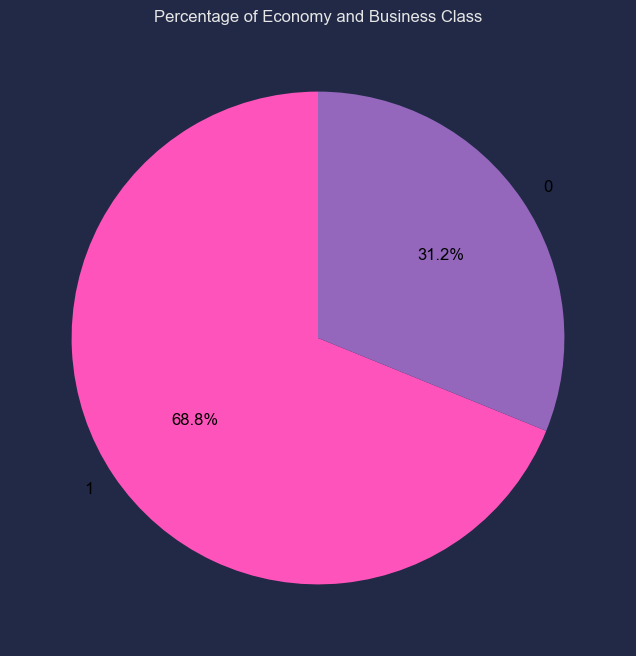

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataff['class_encoded'] = label_encoder.fit_transform(dataff['class'])
print("Unique values in 'class' column:", dataff['class'].unique())
print("Unique values in 'class_encoded' column:", dataff['class_encoded'].unique())
class_counts = dataff['class_encoded'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['C7', 'C5'],textprops={'fontsize': 12, 'color': 'black'})
plt.title('Percentage of Economy and Business Class')
plt.show()

C:\Users\kolup\AppData\Local\Temp\ipykernel_29952\2386300067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataff['departure-time_encoded'] = label_encoder.fit_transform(dataff['departure_time'])


0 : Afternoon
1 : Early_Morning
2 : Evening
3 : Late_Night
4 : Morning
5 : Night


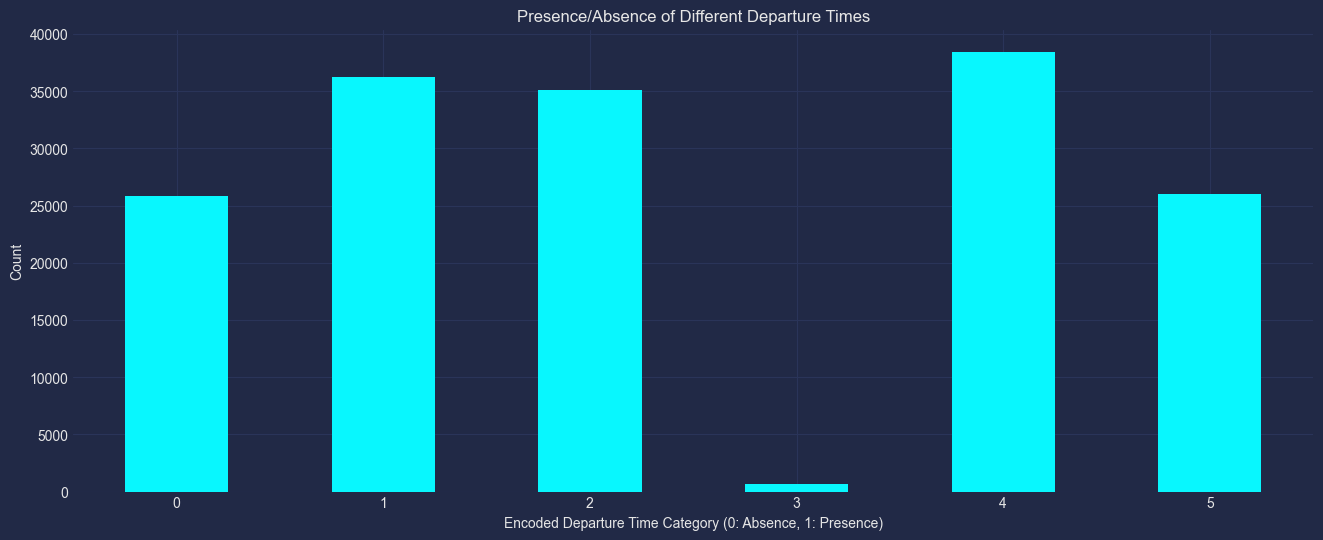

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataff['departure-time_encoded'] = label_encoder.fit_transform(dataff['departure_time'])
mapping_dict = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
plt.figure(figsize=(16, 6))
dataff['departure-time_encoded'].value_counts().sort_index().plot(kind='bar', color='C0')
plt.title('Presence/Absence of Different Departure Times')
plt.xlabel('Encoded Departure Time Category (0: Absence, 1: Presence)')
plt.ylabel('Count')
plt.xticks(rotation=0)
for key, value in mapping_dict.items():
    print(f"{key} : {value}")

plt.show()